In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp /content/drive/MyDrive/kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download behrad3d/nasa-cmaps
! unzip nasa-cmaps.zip

 41% 5.00M/12.3M [00:00<00:00, 38.4MB/s]
100% 12.3M/12.3M [00:00<00:00, 67.4MB/s]
Archive:  nasa-cmaps.zip
  inflating: CMaps/Damage Propagation Modeling.pdf  
  inflating: CMaps/RUL_FD001.txt     
  inflating: CMaps/RUL_FD002.txt     
  inflating: CMaps/RUL_FD003.txt     
  inflating: CMaps/RUL_FD004.txt     
  inflating: CMaps/readme.txt        
  inflating: CMaps/test_FD001.txt    
  inflating: CMaps/test_FD002.txt    
  inflating: CMaps/test_FD003.txt    
  inflating: CMaps/test_FD004.txt    
  inflating: CMaps/train_FD001.txt   
  inflating: CMaps/train_FD002.txt   
  inflating: CMaps/train_FD003.txt   
  inflating: CMaps/train_FD004.txt   
  inflating: CMaps/x.txt             


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
import re
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from pylab import rcParams
import math
import xgboost
import time
from tqdm import tqdm
import keras.models
import keras.layers
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import warnings
warnings.simplefilter('ignore')
from sklearn.metrics import r2_score
from scipy import stats
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, accuracy_score, r2_score, roc_auc_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import math
import shutil
import random
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import numpy as np
import pandas as pd
import sklearn
import os
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import random
np.random.seed(34)

In [ ]:
columns=["id","cycle","op1","op2","op3","sensor1","sensor2","sensor3","sensor4","sensor5","sensor6","sensor7","sensor8",
         "sensor9","sensor10","sensor11","sensor12","sensor13","sensor14","sensor15","sensor16","sensor17","sensor18","sensor19"
         ,"sensor20","sensor21"]

In [ ]:
train_data = pd.read_csv("/content/CMaps/train_FD003.txt", sep= "\s+", header = None,names=columns )

In [ ]:
train_data. head()

,id,cycle,op1,op2,op3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
0,1,1,-0.0005,0.0004,100.0,518.67,642.36,1583.23,1396.84,14.62,...,522.31,2388.01,8145.32,8.4246,0.03,391,2388,100.0,39.11,23.3537
1,1,2,0.0008,-0.0003,100.0,518.67,642.50,1584.69,1396.89,14.62,...,522.42,2388.03,8152.85,8.4403,0.03,392,2388,100.0,38.99,23.4491
2,1,3,-0.0014,-0.0002,100.0,518.67,642.18,1582.35,1405.61,14.62,...,522.03,2388.00,8150.17,8.3901,0.03,391,2388,100.0,38.85,23.3669
3,1,4,-0.0020,0.0001,100.0,518.67,642.92,1585.61,1392.27,14.62,...,522.49,2388.08,8146.56,8.3878,0.03,392,2388,100.0,38.96,23.2951
4,1,5,0.0016,0.0000,100.0,518.67,641.68,1588.63,1397.65,14.62,...,522.58,2388.03,8147.80,8.3869,0.03,392,2388,100.0,39.14,23.4583


In [ ]:
def add_rul(g):
    g['RUL'] = max(g['cycle']) - g['cycle']
    return g

train = train_data.groupby('id').apply(add_rul)

In [ ]:
train.head()

,id,cycle,op1,op2,op3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,RUL
0,1,1,-0.0005,0.0004,100.0,518.67,642.36,1583.23,1396.84,14.62,...,2388.01,8145.32,8.4246,0.03,391,2388,100.0,39.11,23.3537,258
1,1,2,0.0008,-0.0003,100.0,518.67,642.50,1584.69,1396.89,14.62,...,2388.03,8152.85,8.4403,0.03,392,2388,100.0,38.99,23.4491,257
2,1,3,-0.0014,-0.0002,100.0,518.67,642.18,1582.35,1405.61,14.62,...,2388.00,8150.17,8.3901,0.03,391,2388,100.0,38.85,23.3669,256
3,1,4,-0.0020,0.0001,100.0,518.67,642.92,1585.61,1392.27,14.62,...,2388.08,8146.56,8.3878,0.03,392,2388,100.0,38.96,23.2951,255
4,1,5,0.0016,0.0000,100.0,518.67,641.68,1588.63,1397.65,14.62,...,2388.03,8147.80,8.3869,0.03,392,2388,100.0,39.14,23.4583,254


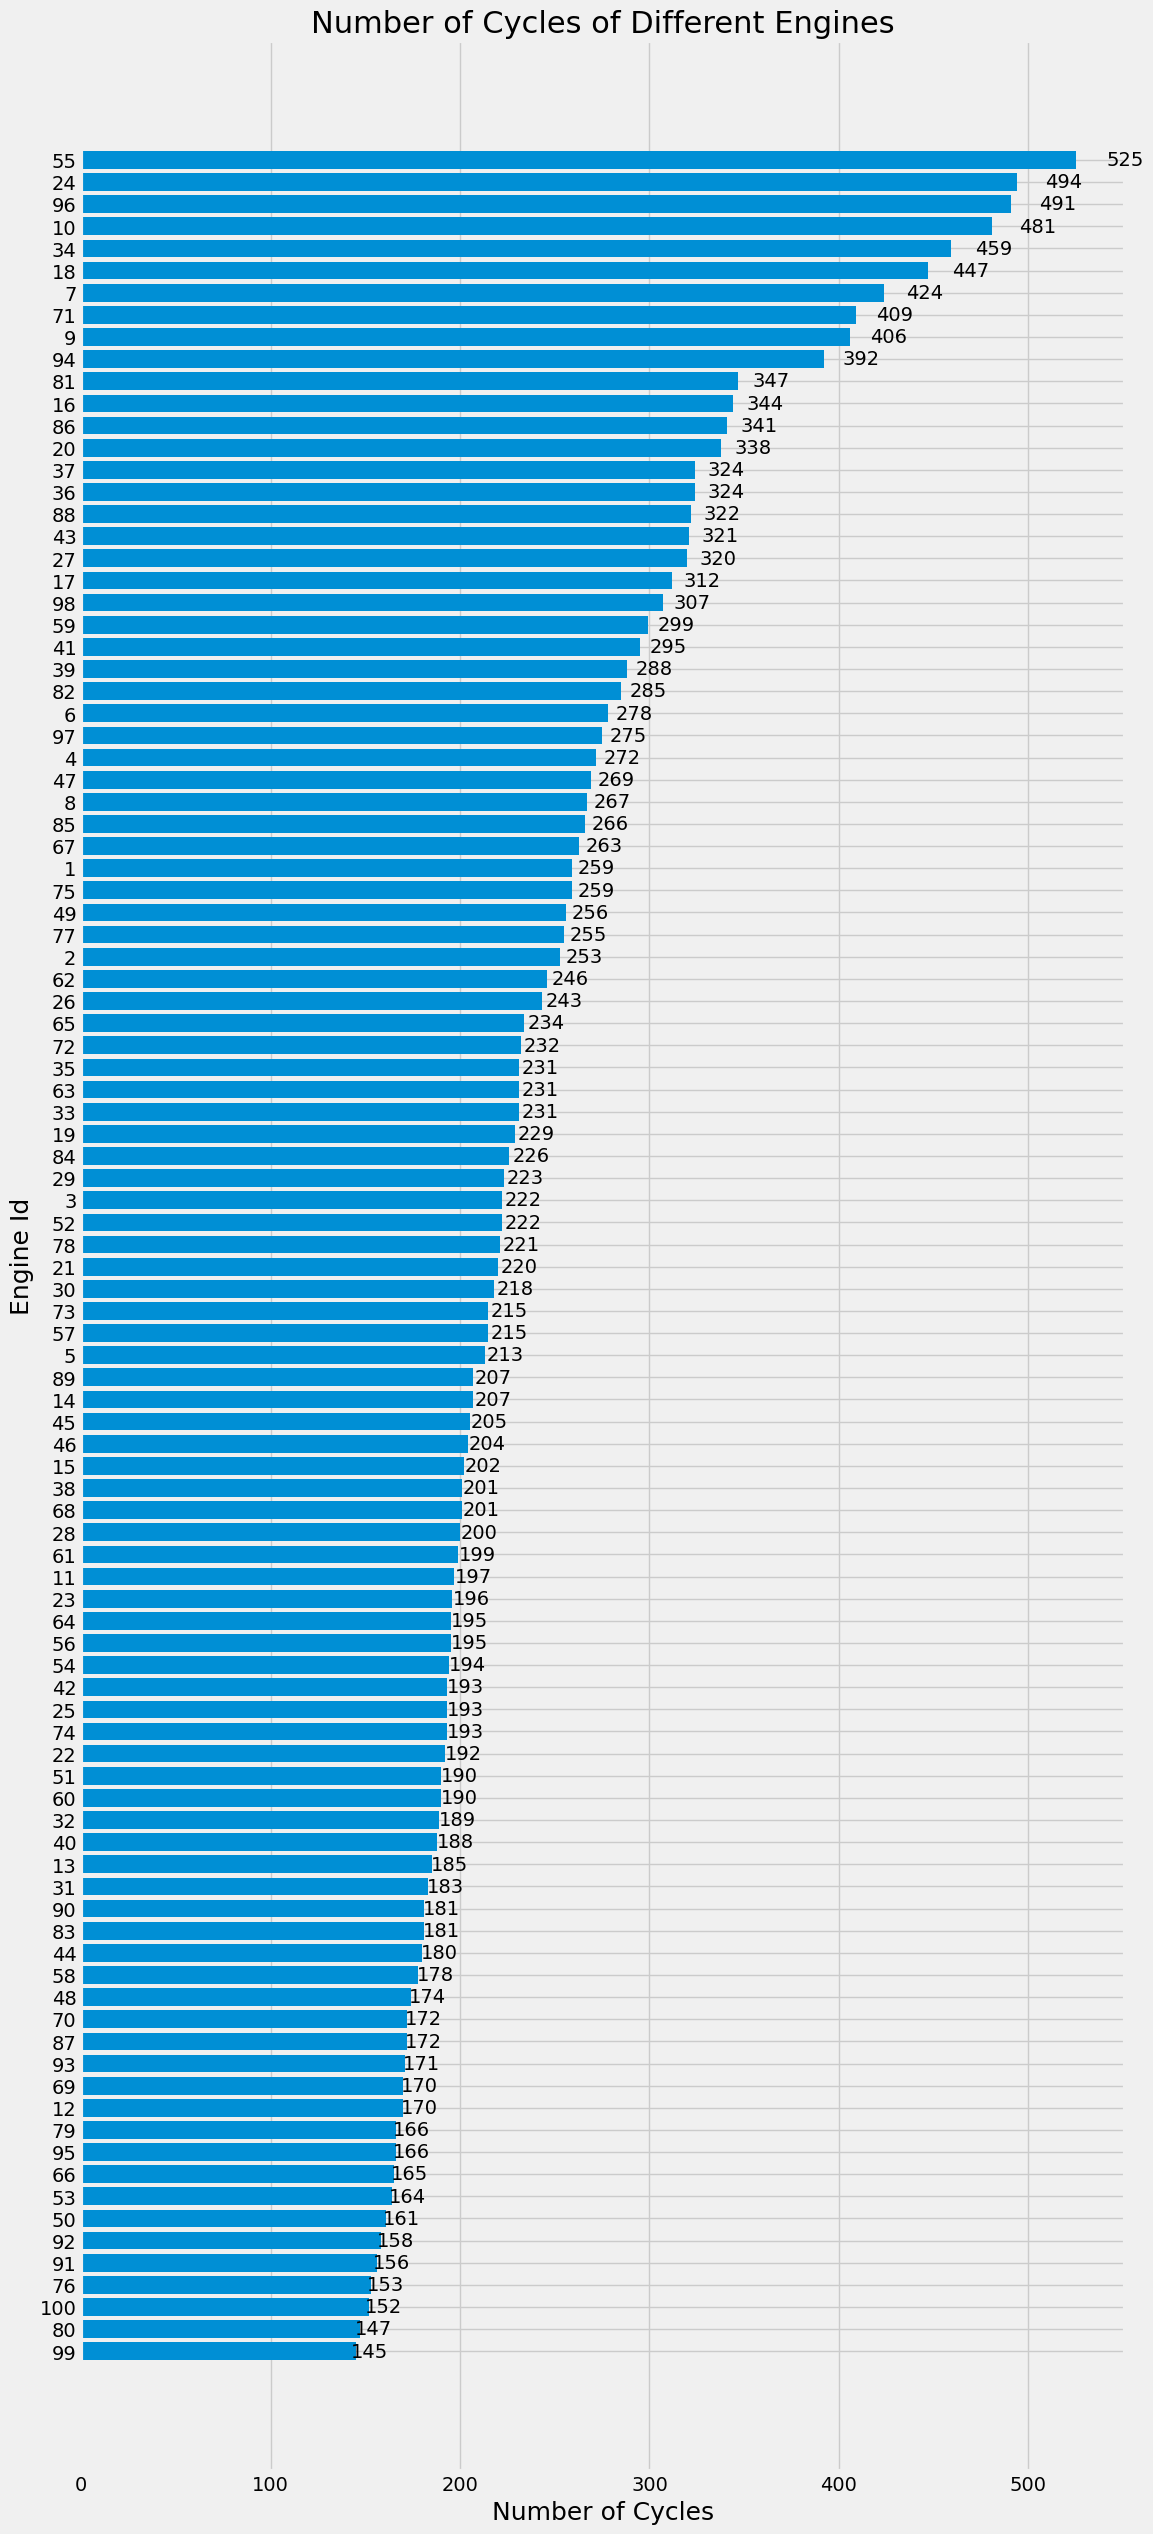

In [ ]:
cnt_train=train_data[["id", "cycle"]].groupby("id").max().sort_values(by="cycle", ascending=True)
cnt_ind = [str(i) for i in cnt_train.index.to_list()]
cnt_val = list(cnt_train.cycle.values)

plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(figsize=(12, 30))
rects = ax.barh(cnt_ind, cnt_val)
ax.set_title("Number of Cycles of Different Engines", fontsize=22)
ax.set_ylabel("Engine Id", fontsize=18)
ax.set_xlabel("Number of Cycles", fontsize=18)
ax.grid(True)

for rect in rects:
    width = rect.get_width()
    plt.text(1.05*rect.get_width(), rect.get_y()+0.5*rect.get_height(),
             '%d' % int(width),
             ha='center', va='center')

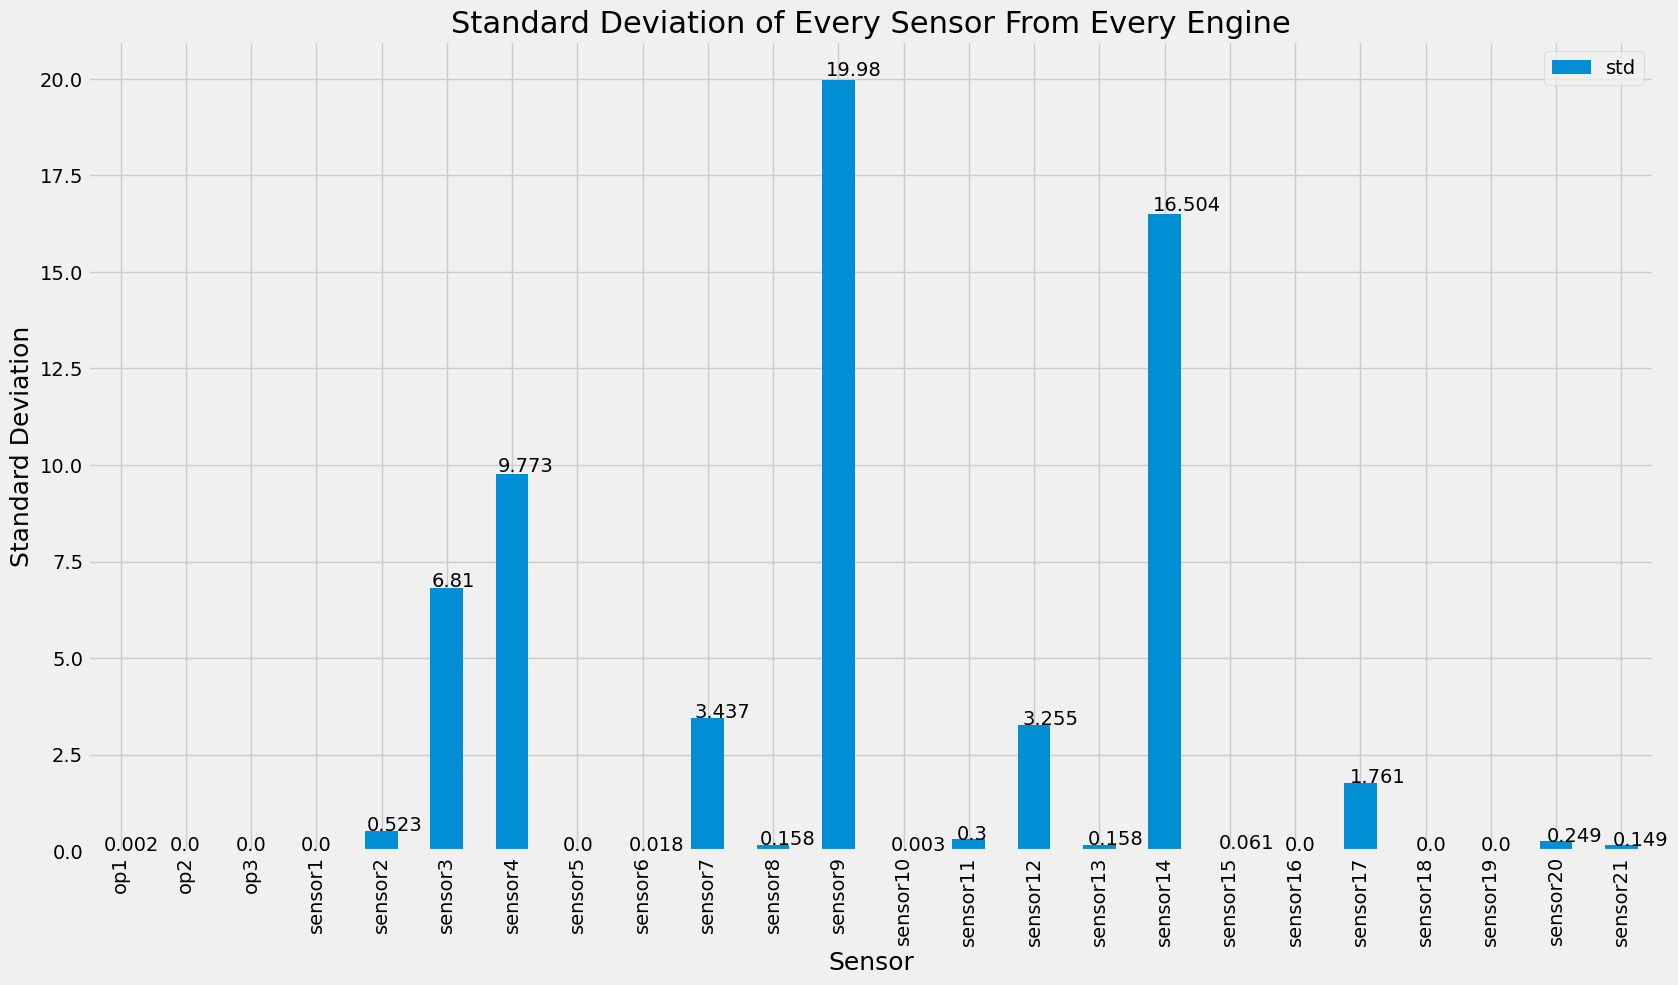

In [ ]:
subset_stats = train_data.agg(['mean', 'std']).T[2:]
ax = subset_stats.plot.bar(figsize=(18,10),
                           y="std")
ax.set_title("Standard Deviation of Every Sensor From Every Engine", fontsize=22)
ax.set_xlabel("Sensor", fontsize=18)
ax.set_ylabel("Standard Deviation", fontsize=18)

for p in ax.patches:
    ax.annotate(str(round(p.get_height(),3)), (p.get_x() * 1.005, p.get_height() * 1.005))

In [ ]:
"""no_std_sensors = ['op3', 'sensor1', 'sensor5', 'sensor10',
                 'sensor16', 'sensor18', 'sensor19']
train = train_data.drop(no_std_sensors, axis=1)
#Let's also plot some sensor data over the cycles of some engines.

def plot_ts_sensors(engine_ids, sensor):
    sub_df = train[train["id"].isin(engine_ids)][["id", "cycle", sensor]]
    sub_df = sub_df.pivot(columns="id", index="cycle", values=sensor)
    ax = sub_df.plot(figsize=(18,10))
    ax.set_title(f"{sensor}", fontsize=22, style="italic")
    ax.set_xlabel("cycle", fontsize=18)
    ax.set_ylabel("value", fontsize=18)
plt_sensors = list(train.columns)[2:]
num_ex = 8
for sens in plt_sensors:
    plot_ts_sensors(random.sample(range(1, 100), num_ex), sens)
"""

'no_std_sensors = [\'op3\', \'sensor1\', \'sensor5\', \'sensor10\',\n                 \'sensor16\', \'sensor18\', \'sensor19\']\ntrain = train_data.drop(no_std_sensors, axis=1)\n#Let\'s also plot some sensor data over the cycles of some engines.\n\ndef plot_ts_sensors(engine_ids, sensor):\n    sub_df = train[train["id"].isin(engine_ids)][["id", "cycle", sensor]]\n    sub_df = sub_df.pivot(columns="id", index="cycle", values=sensor)\n    ax = sub_df.plot(figsize=(18,10))\n    ax.set_title(f"{sensor}", fontsize=22, style="italic")\n    ax.set_xlabel("cycle", fontsize=18)\n    ax.set_ylabel("value", fontsize=18)\nplt_sensors = list(train.columns)[2:]\nnum_ex = 8\nfor sens in plt_sensors:\n    plot_ts_sensors(random.sample(range(1, 100), num_ex), sens)\n'

In [ ]:
def process_targets(data_length, early_rul = None):
    """
    Takes datalength and earlyrul as input and
    creates target rul.
    """
    if early_rul == None:
        return np.arange(data_length-1, -1, -1)
    else:
        early_rul_duration = data_length - early_rul
        if early_rul_duration <= 0:
            return np.arange(data_length-1, -1, -1)
        else:
            return np.append(early_rul*np.ones(shape = (early_rul_duration,)), np.arange(early_rul-1, -1, -1))
def process_input_data_with_targets(input_data, target_data = None, window_length = 1, shift = 1):
    """Depending on values of window_length and shift, this function generates batchs of data and targets
    from input_data and target_data.

    Number of batches = np.floor((len(input_data) - window_length)/shift) + 1

    **We don't check input dimensions uisng exception handling. So readers should be careful while using these
    functions. If input data are not of desired dimension, either error occurs or something undesirable is
    produced as output.**

    Arguments:
        input_data: input data to function (Must be 2 dimensional)
        target_data: input rul values (Must be 1D array)s
        window_length: window length of data
        shift: Distance by which the window moves for next batch. This is closely related to overlap
               between data. For example, if window length is 30 and shift is 1, there is an overlap of
               29 data points between two consecutive batches.

    """
    num_batches = np.int(np.floor((len(input_data) - window_length)/shift)) + 1
    num_features = input_data.shape[1]
    output_data = np.repeat(np.nan, repeats = num_batches * window_length * num_features).reshape(num_batches, window_length,
                                                                                                  num_features)
    if target_data is None:
        for batch in range(num_batches):
            output_data[batch,:,:] = input_data[(0+shift*batch):(0+shift*batch+window_length),:]
        return output_data
    else:
        output_targets = np.repeat(np.nan, repeats = num_batches)
        for batch in range(num_batches):
            output_data[batch,:,:] = input_data[(0+shift*batch):(0+shift*batch+window_length),:]
            output_targets[batch] = target_data[(shift*batch + (window_length-1))]
        return output_data, output_targets
def process_test_data(test_data_for_an_engine, window_length, shift, num_test_windows = 1):
    """ This function takes test data for an engine as first input. The next two inputs
    window_length and shift are same as other functins.

    Finally it takes num_test_windows as the last input. num_test_windows sets how many examplles we
    want from test data (from last). By default it extracts only the last example.

    The function return last examples and number of last examples (a scaler) as output.
    We need the second output later. If we are extracting more than 1 last examples, we have to
    average their prediction results. The second scaler halps us do just that.
    """
    max_num_test_batches = np.int(np.floor((len(test_data_for_an_engine) - window_length)/shift)) + 1
    if max_num_test_batches < num_test_windows:
        required_len = (max_num_test_batches -1)* shift + window_length
        batched_test_data_for_an_engine = process_input_data_with_targets(test_data_for_an_engine[-required_len:, :],
                                                                          target_data = None,
                                                                          window_length = window_length, shift = shift)
        return batched_test_data_for_an_engine, max_num_test_batches
    else:
        required_len = (num_test_windows - 1) * shift + window_length
        batched_test_data_for_an_engine = process_input_data_with_targets(test_data_for_an_engine[-required_len:, :],
                                                                          target_data = None,
                                                                          window_length = window_length, shift = shift)
        return batched_test_data_for_an_engine, num_test_windows

In [ ]:
test_data = pd.read_csv("/content/CMaps/test_FD003.txt", sep = "\s+", header = None,names=columns )
true_rul = pd.read_csv("/content/CMaps/RUL_FD003.txt", sep = '\s+', header = None)

In [ ]:
columns_to_be_dropped =['id', 'op1','op2','op3', 'sensor1', 'sensor5', 'sensor6','sensor11','sensor10',
                 'sensor16', 'sensor15', 'sensor19']
#[0,1,2,3,4,5,9,10,11,14,20,21,22,23,24,25]
window_length = 30
shift = 1
early_rul = 125
processed_train_data = []
processed_train_targets = []

# How many test windows to take for each engine. If set to 1 (this is the default), only last window of test data for
# each engine is taken. If set to a different number, that many windows from last are taken.
# Final output is the average output of all windows.
num_test_windows = 5
processed_test_data = []
num_test_windows_list = []

#columns_to_be_dropped = [0,1,2,3,4,5,9,10,14,20,22,23]

train_data_first_column = train_data['id']
test_data_first_column = test_data['id']

# Scale data for all engines
scaler = MinMaxScaler(feature_range = (-1,1))
train_data = scaler.fit_transform(train_data.drop(columns = columns_to_be_dropped))
test_data = scaler.transform(test_data.drop(columns = columns_to_be_dropped))

train_data = pd.DataFrame(data = np.c_[train_data_first_column, train_data])
test_data = pd.DataFrame(data = np.c_[test_data_first_column, test_data])

num_train_machines = len(train_data[0].unique())
num_test_machines = len(test_data[0].unique())

# Process training and test data sepeartely as number of engines in training and test set may be different.
# As we are doing scaling for full dataset, we are not bothered by different number of engines in training and test set.

# Process trianing data
for i in np.arange(1, num_train_machines + 1):
    temp_train_data = train_data[train_data[0] == i].drop(columns = [0]).values

    # Verify if data of given window length can be extracted from training data
    if (len(temp_train_data) < window_length):
        print("Train engine {} doesn't have enough data for window_length of {}".format(i, window_length))
        raise AssertionError("Window length is larger than number of data points for some engines. "
                             "Try decreasing window length.")

    temp_train_targets = process_targets(data_length = temp_train_data.shape[0], early_rul = early_rul)
    data_for_a_machine, targets_for_a_machine = process_input_data_with_targets(temp_train_data, temp_train_targets,
                                                                                window_length = window_length, shift = shift)

    processed_train_data.append(data_for_a_machine)
    processed_train_targets.append(targets_for_a_machine)

processed_train_data = np.concatenate(processed_train_data)
processed_train_targets = np.concatenate(processed_train_targets)

# Process test data
for i in np.arange(1, num_test_machines + 1):
    temp_test_data = test_data[test_data[0] == i].drop(columns = [0]).values

    # Verify if data of given window length can be extracted from test data
    if (len(temp_test_data) < window_length):
        print("Test engine {} doesn't have enough data for window_length of {}".format(i, window_length))
        raise AssertionError("Window length is larger than number of data points for some engines. "
                             "Try decreasing window length.")

    # Prepare test data
    test_data_for_an_engine, num_windows = process_test_data(temp_test_data, window_length = window_length, shift = shift,
                                                             num_test_windows = num_test_windows)

    processed_test_data.append(test_data_for_an_engine)
    num_test_windows_list.append(num_windows)

processed_test_data = np.concatenate(processed_test_data)
true_rul = true_rul[0].values

# Shuffle training data
index = np.random.permutation(len(processed_train_targets))
processed_train_data, processed_train_targets = processed_train_data[index], processed_train_targets[index]

print("Processed trianing data shape: ", processed_train_data.shape)
print("Processed training ruls shape: ", processed_train_targets.shape)
print("Processed test data shape: ", processed_test_data.shape)
print("True RUL shape: ", true_rul.shape)

Processed trianing data shape:  (21820, 30, 14)
Processed training ruls shape:  (21820,)
Processed test data shape:  (500, 30, 14)
True RUL shape:  (100,)


In [ ]:
processed_train_data, processed_val_data, processed_train_targets, processed_val_targets = train_test_split(processed_train_data,
                                                                                                            processed_train_targets,
                                                                                                            test_size = 0.2,
                                                                                                            random_state = 83)
print("Processed train data shape: ", processed_train_data.shape)
print("Processed validation data shape: ", processed_val_data.shape)
print("Processed train targets shape: ", processed_train_targets.shape)
print("Processed validation targets shape: ", processed_val_targets.shape)

Processed train data shape:  (17456, 30, 14)
Processed validation data shape:  (4364, 30, 14)
Processed train targets shape:  (17456,)
Processed validation targets shape:  (4364,)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D
from keras.layers import Dropout, Input
from keras import initializers
from keras.layers import MaxPooling1D
from keras.models import Model
from keras.layers import TimeDistributed, Flatten
from keras.layers import LSTM

In [ ]:
def create_compiled_model(lr=0.001, drop_CNN=0, drop_dense=0.2, kernel_size=3):
    model = Sequential()
    intput_shape=(window_length, processed_train_data.shape[2])
    model.add(Conv1D(128, kernel_size=kernel_size, padding = "same", activation="relu", input_shape = intput_shape))
    model.add(Dropout(drop_CNN))
    model.add(MaxPooling1D(pool_size=2, padding='same'))
    model.add(Conv1D(128,kernel_size=kernel_size, padding = "same", activation="relu"))
    model.add(Dropout(drop_CNN))
    model.add(MaxPooling1D(pool_size=2, padding='same'))
    model.add(TimeDistributed(Flatten()))
    model.add(LSTM(units = 128, return_sequences=True))
    model.add(LSTM(units = 128, return_sequences=False))
    model.add(Dense(200, activation='relu'))
    model.add(Dropout(drop_dense))
    model.add(Dense(1, activation = 'linear'))
    opt = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer=opt, loss='mse')

    return model

In [ ]:
def scheduler(epoch):
    if epoch < 5:
        return 0.001
    else:
        return 0.0001
callback = tf.keras.callbacks.LearningRateScheduler(scheduler, verbose = 1)
model = create_compiled_model()
history = model.fit(processed_train_data, processed_train_targets, epochs = 10,
                    validation_data = (processed_val_data, processed_val_targets),
                    callbacks = callback,
                    batch_size = 64, verbose = 2)


Epoch 1: LearningRateScheduler setting learning rate to 0.001.
Epoch 1/10
273/273 - 21s - loss: 2038.2610 - val_loss: 326.9107 - lr: 0.0010 - 21s/epoch - 76ms/step

Epoch 2: LearningRateScheduler setting learning rate to 0.001.
Epoch 2/10
273/273 - 15s - loss: 304.0904 - val_loss: 209.7927 - lr: 0.0010 - 15s/epoch - 54ms/step

Epoch 3: LearningRateScheduler setting learning rate to 0.001.
Epoch 3/10
273/273 - 15s - loss: 195.7373 - val_loss: 129.1414 - lr: 0.0010 - 15s/epoch - 54ms/step

Epoch 4: LearningRateScheduler setting learning rate to 0.001.
Epoch 4/10
273/273 - 15s - loss: 160.2405 - val_loss: 109.8448 - lr: 0.0010 - 15s/epoch - 57ms/step

Epoch 5: LearningRateScheduler setting learning rate to 0.001.
Epoch 5/10
273/273 - 15s - loss: 144.5070 - val_loss: 97.8280 - lr: 0.0010 - 15s/epoch - 54ms/step

Epoch 6: LearningRateScheduler setting learning rate to 0.0001.
Epoch 6/10
273/273 - 15s - loss: 118.6325 - val_loss: 90.2427 - lr: 1.0000e-04 - 15s/epoch - 54ms/step

Epoch 7: Le

In [ ]:
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 30, 128)           5504      
                                                                 
 dropout_9 (Dropout)         (None, 30, 128)           0         
                                                                 
 max_pooling1d_6 (MaxPoolin  (None, 15, 128)           0         
 g1D)                                                            
                                                                 
 conv1d_7 (Conv1D)           (None, 15, 128)           49280     
                                                                 
 dropout_10 (Dropout)        (None, 15, 128)           0         
                                                                 
 max_pooling1d_7 (MaxPoolin  (None, 8, 128)            0         
 g1D)                                                 

In [ ]:
rul_pred = model.predict(processed_test_data).reshape(-1)
preds_for_each_engine = np.split(rul_pred, np.cumsum(num_test_windows_list)[:-1])
mean_pred_for_each_engine = [np.average(ruls_for_each_engine, weights = np.repeat(1/num_windows, num_windows))
                             for ruls_for_each_engine, num_windows in zip(preds_for_each_engine, num_test_windows_list)]
RMSE = np.sqrt(mean_squared_error(true_rul, mean_pred_for_each_engine))
print("RMSE: ", RMSE)

16/16 [==============================] - 1s 11ms/step
RMSE:  15.513532732411372


In [ ]:
tf.keras.models.save_model(model, "FD001_LSTM_piecewise_RMSE_"+ str(np.round(RMSE, 4)) + ".h5")
#We will now compute the RMSE by taking only last example of each engine.

indices_of_last_examples = np.cumsum(num_test_windows_list) - 1
preds_for_last_example = np.concatenate(preds_for_each_engine)[indices_of_last_examples]

RMSE_new = np.sqrt(mean_squared_error(true_rul, preds_for_last_example))
print("RMSE (Taking only last examples): ", RMSE_new)

RMSE (Taking only last examples):  14.220844534047252


In [ ]:
def compute_s_score(rul_true, rul_pred):
    """
    Both rul_true and rul_pred should be 1D numpy arrays.
    """
    diff = rul_pred - rul_true
    return np.sum(np.where(diff < 0, np.exp(-diff/13)-1, np.exp(diff/10)-1))
s_score = compute_s_score(true_rul, preds_for_last_example)
print("S-score: ", s_score)

S-score:  363.05703383597756


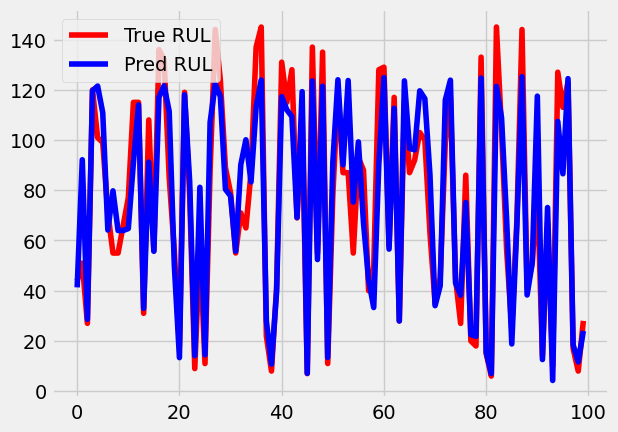

In [ ]:
# Plot true and predicted RUL values
plt.plot(true_rul, label = "True RUL", color = "red")
plt.plot(preds_for_last_example, label = "Pred RUL", color = "blue")
plt.legend()
plt.show()

In [ ]:
r2 = r2_score(true_rul, preds_for_last_example)
print("R2-Score: ", r2)

R2-Score:  0.8819837170281158


In [ ]:
preds_for_last_example

array([ 21.097614 , 119.917786 ,  68.98604  , 110.25495  ,  14.040551 ,
       113.69563  ,  15.483664 ,  47.869427 ,  11.366195 , 115.08821  ,
        17.93522  , 104.66571  ,  75.681725 ,   8.364335 ,  52.753185 ,
       100.883575 ,  76.00269  , 122.5789   ,  25.139374 ,  68.74884  ,
        48.522854 ,   5.704844 , 121.34337  , 110.27519  ,  99.530304 ,
       111.843216 , 114.31199  , 123.08924  ,  88.598854 ,  82.23445  ,
       105.982864 ,  16.326508 ,  41.13788  , 116.15959  , 101.5607   ,
        76.70981  , 119.334625 ,  39.53411  ,  39.630306 ,  26.101532 ,
        40.519424 ,  39.87312  ,  31.41846  ,   8.610509 ,  11.614106 ,
       115.20633  , 100.22315  ,  27.872337 , 117.11861  ,  12.552031 ,
       121.33912  ,  20.24223  ,  50.28521  , 108.50346  ,  90.80395  ,
       119.006454 , 118.8976   ,  23.166834 , 123.431656 ,  66.2735   ,
       114.4808   ,  23.249039 ,  43.220413 ,  18.640408 ,  17.128773 ,
       111.1216   ,  95.54305  ,  50.45947  , 105.40046  ,  14.7

In [ ]:
preds_for_last_example

array([ 21.097614 , 119.917786 ,  68.98604  , 110.25495  ,  14.040551 ,
       113.69563  ,  15.483664 ,  47.869427 ,  11.366195 , 115.08821  ,
        17.93522  , 104.66571  ,  75.681725 ,   8.364335 ,  52.753185 ,
       100.883575 ,  76.00269  , 122.5789   ,  25.139374 ,  68.74884  ,
        48.522854 ,   5.704844 , 121.34337  , 110.27519  ,  99.530304 ,
       111.843216 , 114.31199  , 123.08924  ,  88.598854 ,  82.23445  ,
       105.982864 ,  16.326508 ,  41.13788  , 116.15959  , 101.5607   ,
        76.70981  , 119.334625 ,  39.53411  ,  39.630306 ,  26.101532 ,
        40.519424 ,  39.87312  ,  31.41846  ,   8.610509 ,  11.614106 ,
       115.20633  , 100.22315  ,  27.872337 , 117.11861  ,  12.552031 ,
       121.33912  ,  20.24223  ,  50.28521  , 108.50346  ,  90.80395  ,
       119.006454 , 118.8976   ,  23.166834 , 123.431656 ,  66.2735   ,
       114.4808   ,  23.249039 ,  43.220413 ,  18.640408 ,  17.128773 ,
       111.1216   ,  95.54305  ,  50.45947  , 105.40046  ,  14.7